## Import Dependency

In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

## Load Dataset

In [5]:
file =  '../Dataset/processed_insurance.csv'

In [6]:
df = pd.read_csv(file)

In [7]:
df.head()

,age,bmi,smoker_yes,charges,charges_log
0,19,27.900,True,16884.92400,9.734236
1,18,33.770,False,1725.55230,7.453882
2,28,33.000,False,4449.46200,8.400763
3,33,22.705,False,21984.47061,9.998137
4,32,28.880,False,3866.85520,8.260455


## Prepare Data For Training Traditional Machine Learning Models

In [9]:
# Features and target
X = df[['age', 'bmi', 'smoker_yes']]  # Your input features
y = df['charges']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prepare Data For Deep Learning Model

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Traditional Machine Learning Model 

## RandomForestRegressor

In [45]:
# Record the start time for training
start_time_rf = time.time()

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Record the end time for training
end_time_rf = time.time()

# Calculate the training time
training_time_rf = end_time_rf - start_time_rf

In [46]:
# Make predictions on the test set
y_pred_test = rf_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# --- Evaluate on TRAIN set ---
y_pred_train = rf_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# --- Print results ---
print("\n🔍 Random Forest Performance Comparison:")
print(f"Training Time: {training_time_rf:.2f} seconds\n")

print("Training Set Metrics:")
print(f"  MAE: {mae_train}")
print(f"  MSE: {mse_train}")
print(f"  R²:  {r2_train}")

print("\nTest Set Metrics:")
print(f"  MAE: {mae_test}")
print(f"  MSE: {mse_test}")
print(f"  R²:  {r2_test}")



🔍 Random Forest Performance Comparison:
Training Time: 0.76 seconds

Training Set Metrics:
  MAE: 913.4064940524332
  MSE: 3241014.3950068215
  R²:  0.9852639403810766

Test Set Metrics:
  MAE: 2146.7095841806286
  MSE: 17973165.88961161
  R²:  0.9217814665049865


In [16]:
# Display feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame to show the importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

      Feature  Importance
2  smoker_yes    0.623598
1         bmi    0.292895
0         age    0.083507


## Feed-Forward Neural Network

In [18]:
# Initialize the neural network
model = Sequential()

# Input layer with input shape as (X_train_scaled.shape[1],) for the number of features
model.add(Input(shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(Dense(124, activation='relu')) # Rectified Linear Unit
model.add(Dense(64, activation='relu'))

# Output layer for regression (single output)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [19]:
# Create EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Record the start time for training
start_time = time.time()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=30, validation_data=(X_test_scaled, y_test), verbose=1, callbacks=[early_stopping])

# Record the end time for training
end_time = time.time()
# Calculate the training time
training_time = end_time - start_time

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 628906240.0000 - mean_absolute_error: 20223.2637 - mean_squared_error: 628906240.0000 - val_loss: 632419776.0000 - val_mean_absolute_error: 20066.9668 - val_mean_squared_error: 632419776.0000
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 627965376.0000 - mean_absolute_error: 20204.1309 - mean_squared_error: 627965376.0000 - val_loss: 630458560.0000 - val_mean_absolute_error: 20028.9746 - val_mean_squared_error: 630458560.0000
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 624096576.0000 - mean_absolute_error: 20132.8770 - mean_squared_error: 624096576.0000 - val_loss: 624094464.0000 - val_mean_absolute_error: 19915.3574 - val_mean_squared_error: 624094464.0000
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 614573184.0000 - mean_absolute_error: 19962.8926 - mean_squared_error: 614573184.0000 - val_loss: 610104512.0000 - val_mean_absolute_error: 19678.3672 - val_mean_squared_error: 610104512.

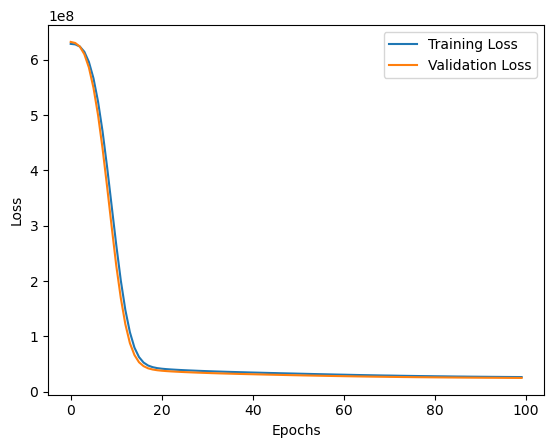

In [20]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Make predictions
y_pred_train_nn = model.predict(X_train_scaled)
y_pred_nn = model.predict(X_test_scaled)

mae_train_nn = mean_absolute_error(y_train, y_pred_train_nn)
mse_train_nn = mean_squared_error(y_train, y_pred_train_nn)
r2_train_nn = r2_score(y_train, y_pred_train_nn)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Training Set Metrics:")
print(f"  MAE: {mae_train_nn}")
print(f"  MSE: {mse_train_nn}")
print(f"  R²:  {r2_train_nn}")

print("\nTest Set Metrics:")
print(f"  MAE: {mae_nn}")
print(f"  MSE: {mse_nn}")
print(f"  R²:  {r2_nn}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training Set Metrics:
  MAE: 3450.375706005533
  MSE: 26262001.838694017
  R²:  0.880593426118844

Test Set Metrics:
  MAE: 3364.335724766824
  MSE: 24769814.533612724
  R²:  0.8922027104372025
